**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**


Matrix Multiplication
Number of Multiplications and Additions
For matrix multiplication of a

(n,k) matrix **A** and a (k,m) matrix **B**:

Multiplications:

Each element in the resulting

(n,m) matrix  C is the dot product of a row from A and a column from B.
Each dot product requires
k multiplications.
There are n×m elements in C.
Total multiplications:

***n×m×k***

Additions:

For each element in

C,

k−1 additions are required (since the first multiplication doesn't require an addition).
Total additions:
***n×m×(k−1)***

In [10]:
import numpy as np
import pandas as pd
def matrix_multiply_list(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)] # zero matrix initialization

    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    return C

A = [[1, 2], [3, 4], [5, 6]]
B = [[7, 8], [9, 10]]
C = matrix_multiply_list(A, B)
print(C)
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8], [9, 10]])

C = np.dot(A, B)
print(f"Result from numpy multiplication:\n{C}")


[[25, 28], [57, 64], [89, 100]]
Result from numpy multiplication:
[[ 25  28]
 [ 57  64]
 [ 89 100]]


In [11]:
import time
n, k, m = 200, 300, 100
A = np.random.rand(n, k).tolist()
B = np.random.rand(k, m).tolist()

# Timing list of lists multiplication
start_time = time.time()
C_list = matrix_multiply_list(A, B)
list_time = time.time() - start_time

# Timing NumPy multiplication
A_np = np.array(A)
B_np = np.array(B)
start_time = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start_time

print(f"List of Lists Time: {list_time:.5f} seconds")
print(f"NumPy Time: {numpy_time:.5f} seconds")


List of Lists Time: 1.39432 seconds
NumPy Time: 0.00087 seconds


**Which One is Faster? Why?**

NumPy is significantly faster than using lists of lists. This is because NumPy operations are implemented in C and optimized for performance. Additionally, NumPy uses efficient memory management and takes advantage of vectorized operations, which greatly speed up matrix computations.

Finding the Median
Naive Method (Time Complexity) VS
Finding the median by sorting the array

Sorting the array requires
𝑂
(
𝑛
log
⁡
𝑛
)
time complexity.
Finding the median from the sorted array requires
𝑂
(
1
)
.
Total time complexity:
𝑂
(
𝑛
log
⁡
𝑛
)



In [29]:
def find_median_naive(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2



# Example list

np.random.seed(40)
arr = [np.random.randint(1, 1000) for _ in range(10000)]

# Timing Naive Method
start_time = time.time()
median_naive = find_median_naive(arr)
naive_time = time.time() - start_time


# Timing NumPy Method
start_time = time.time()
median_numpy = np.median(arr)
numpy_time = time.time() - start_time

print(f"Naive Method Time: {naive_time:.5f} seconds")
print(f"NumPy Method Time: {numpy_time:.5f} seconds")


Naive Method Time: 0.00186 seconds
NumPy Method Time: 0.00087 seconds


### Gradient Calculation and Verification

#### 4. What is the gradient of the following function with respect to \( x \) and \( y \)?

$$f(x, y) = x^2 y + y^3 \sin(x)$$

**Solution:**

To find the gradient, we need to compute the partial derivatives of \( f \) with respect to \( x \) and \( y \).

$$ \frac{\partial f}{\partial x} = 2xy + y^3 \cos(x) $$

$$\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x) $$

#### 5. Use `jax` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of \( x \) and \( y \).

```python



In [4]:
# !pip install --upgrade jax jaxlib

import jax
import jax.numpy as jnp

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute the gradient using JAX
grad_f = jax.grad(f, argnums=(0, 1))

# Test with some random values
x_val = 2.0
y_val = 3.0

grad_val = grad_f(x_val, y_val)
print(f"Gradient at x={x_val}, y={y_val}: {grad_val}")

Gradient at x=2.0, y=3.0: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))


In [5]:
# !pip install sympy

import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient using SymPy
grad_f_sympy = [sp.diff(f, var) for var in (x, y)]

# Simplify the expressions
grad_f_sympy = [sp.simplify(g) for g in grad_f_sympy]

print(f"Gradient wrt x: {grad_f_sympy[0]}")
print(f"Gradient wrt y: {grad_f_sympy[1]}")
x_val = 2
y_val = 3
grad_evaluated = [g.evalf(subs={x: x_val, y: y_val}) for g in grad_f_sympy]
print(f"Gradient at x={x_val}, y={y_val}: {grad_evaluated}")


Gradient wrt x: y*(2*x + y**2*cos(x))
Gradient wrt y: x**2 + 3*y**2*sin(x)
Gradient at x=2, y=3: [0.764035413227156, 28.5510305242934]


**Summary:**

- The partial derivatives found analytically are:
  $$
  \frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
  $$
  $$
  \frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
  $$

- The gradient computed using `jax` matches the analytical solution.
- The gradient computed using `sympy` matches the analytical solution as well.


**Summary:**

- The partial derivatives found analytically are:
  $$
  \frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
  $$
  $$
  \frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
  $$

- The gradient computed using `jax` matches the analytical solution.
- The gradient computed using `sympy` matches the analytical solution as well.
- The gradient evaluated using `sympy` at $$ x = 2 $$ and $$y = 3 $$ is:
  $$
  \left[ 2(2)(3) + 3^3 \cos(2), \quad 2^2 + 3 \cdot 3^2 \sin(2) \right]
  $$


In [30]:
students_records = {
    2022: {
        "Branch 1": {
            1: {"Name": "N", "Marks": {"Maths": 100, "English": 70}},
            2: {"Name": "M", "Marks": {"Maths": 85, "English": 90}}
        },
        "Branch 2": {
            3: {"Name": "A", "Marks": {"Maths": 75, "English": 80}},
            4: {"Name": "B", "Marks": {"Maths": 95, "English": 85}}
        }
    },
    2023: {
        "Branch 1": {
            5: {"Name": "C", "Marks": {"Maths": 88, "English": 78}},
            6: {"Name": "D", "Marks": {"Maths": 92, "English": 81}}
        },
        "Branch 2": {
            7: {"Name": "E", "Marks": {"Maths": 79, "English": 85}},
            8: {"Name": "F", "Marks": {"Maths": 84, "English": 88}}
        }
    },
    2024: {
        "Branch 1": {
            9: {"Name": "G", "Marks": {"Maths": 90, "English": 87}},
            10: {"Name": "H", "Marks": {"Maths": 85, "English": 83}}
        },
        "Branch 2": {
            11: {"Name": "I", "Marks": {"Maths": 88, "English": 82}},
            12: {"Name": "J", "Marks": {"Maths": 91, "English": 80}}
        }
    },
    2025: {
        "Branch 1": {
            13: {"Name": "K", "Marks": {"Maths": 87, "English": 89}},
            14: {"Name": "L", "Marks": {"Maths": 93, "English": 91}}
        },
        "Branch 2": {
            15: {"Name": "M", "Marks": {"Maths": 78, "English": 84}},
            16: {"Name": "N", "Marks": {"Maths": 85, "English": 88}}
        }
    }
}

# Example usage
for year, branches in students_records.items():
    print(f"Year: {year}")
    for branch, students in branches.items():
        print(f"  {branch}:")
        for roll_number, details in students.items():
            print(f"    Roll Number: {roll_number}, Name: {details['Name']}, Marks: {details['Marks']}")


Year: 2022
  Branch 1:
    Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
    Roll Number: 2, Name: M, Marks: {'Maths': 85, 'English': 90}
  Branch 2:
    Roll Number: 3, Name: A, Marks: {'Maths': 75, 'English': 80}
    Roll Number: 4, Name: B, Marks: {'Maths': 95, 'English': 85}
Year: 2023
  Branch 1:
    Roll Number: 5, Name: C, Marks: {'Maths': 88, 'English': 78}
    Roll Number: 6, Name: D, Marks: {'Maths': 92, 'English': 81}
  Branch 2:
    Roll Number: 7, Name: E, Marks: {'Maths': 79, 'English': 85}
    Roll Number: 8, Name: F, Marks: {'Maths': 84, 'English': 88}
Year: 2024
  Branch 1:
    Roll Number: 9, Name: G, Marks: {'Maths': 90, 'English': 87}
    Roll Number: 10, Name: H, Marks: {'Maths': 85, 'English': 83}
  Branch 2:
    Roll Number: 11, Name: I, Marks: {'Maths': 88, 'English': 82}
    Roll Number: 12, Name: J, Marks: {'Maths': 91, 'English': 80}
Year: 2025
  Branch 1:
    Roll Number: 13, Name: K, Marks: {'Maths': 87, 'English': 89}
    Roll Number: 14, N

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [31]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __str__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __str__(self):
        return f"Branch: {self.name}, Students: {[str(student) for student in self.students]}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __str__(self):
        return f"Year: {self.year}, Branches: {[str(branch) for branch in self.branches]}"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __str__(self):
        return f"Database: {[str(year) for year in self.years]}"

# Create database
database = Database()

# Create years
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)

# Create branches for 2022
branch1_2022 = Branch("Branch 1")
branch2_2022 = Branch("Branch 2")

# Add students to branches
branch1_2022.add_student(Student(1, "N", {"Maths": 100, "English": 70}))
branch1_2022.add_student(Student(2, "M", {"Maths": 85, "English": 90}))
branch2_2022.add_student(Student(3, "A", {"Maths": 75, "English": 80}))
branch2_2022.add_student(Student(4, "B", {"Maths": 95, "English": 85}))

# Add branches to year 2022
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

# Create branches for 2023
branch1_2023 = Branch("Branch 1")
branch2_2023 = Branch("Branch 2")

# Add students to branches
branch1_2023.add_student(Student(5, "C", {"Maths": 88, "English": 78}))
branch1_2023.add_student(Student(6, "D", {"Maths": 92, "English": 81}))
branch2_2023.add_student(Student(7, "E", {"Maths": 79, "English": 85}))
branch2_2023.add_student(Student(8, "F", {"Maths": 84, "English": 88}))

# Add branches to year 2023
year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)

# Create branches for 2024
branch1_2024 = Branch("Branch 1")
branch2_2024 = Branch("Branch 2")

# Add students to branches
branch1_2024.add_student(Student(9, "G", {"Maths": 90, "English": 87}))
branch1_2024.add_student(Student(10, "H", {"Maths": 85, "English": 83}))
branch2_2024.add_student(Student(11, "I", {"Maths": 88, "English": 82}))
branch2_2024.add_student(Student(12, "J", {"Maths": 91, "English": 80}))

# Add branches to year 2024
year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)

# Create branches for 2025
branch1_2025 = Branch("Branch 1")
branch2_2025 = Branch("Branch 2")

# Add students to branches
branch1_2025.add_student(Student(13, "K", {"Maths": 87, "English": 89}))
branch1_2025.add_student(Student(14, "L", {"Maths": 93, "English": 91}))
branch2_2025.add_student(Student(15, "M", {"Maths": 78, "English": 84}))
branch2_2025.add_student(Student(16, "N", {"Maths": 85, "English": 88}))

# Add branches to year 2025
year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)

# Add years to database
database.add_year(year_2022)
database.add_year(year_2023)
database.add_year(year_2024)
database.add_year(year_2025)

# Print database
print(database)


Database: ['Year: 2022, Branches: [\'Branch: Branch 1, Students: ["Roll Number: 1, Name: N, Marks: {\\\'Maths\\\': 100, \\\'English\\\': 70}", "Roll Number: 2, Name: M, Marks: {\\\'Maths\\\': 85, \\\'English\\\': 90}"]\', \'Branch: Branch 2, Students: ["Roll Number: 3, Name: A, Marks: {\\\'Maths\\\': 75, \\\'English\\\': 80}", "Roll Number: 4, Name: B, Marks: {\\\'Maths\\\': 95, \\\'English\\\': 85}"]\']', 'Year: 2023, Branches: [\'Branch: Branch 1, Students: ["Roll Number: 5, Name: C, Marks: {\\\'Maths\\\': 88, \\\'English\\\': 78}", "Roll Number: 6, Name: D, Marks: {\\\'Maths\\\': 92, \\\'English\\\': 81}"]\', \'Branch: Branch 2, Students: ["Roll Number: 7, Name: E, Marks: {\\\'Maths\\\': 79, \\\'English\\\': 85}", "Roll Number: 8, Name: F, Marks: {\\\'Maths\\\': 84, \\\'English\\\': 88}"]\']', 'Year: 2024, Branches: [\'Branch: Branch 1, Students: ["Roll Number: 9, Name: G, Marks: {\\\'Maths\\\': 90, \\\'English\\\': 87}", "Roll Number: 10, Name: H, Marks: {\\\'Maths\\\': 85, \\\'Eng

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [32]:
import pandas as pd
np.random.seed(0)
m = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(m, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
max_std_col = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

print(f"Column with highest standard deviation: {max_std_col}")
print(f"Row with lowest mean: {min_mean_row}")



Column with highest standard deviation: c
Row with lowest mean: 15


Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [33]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

# Find the number of rows in the dataframe where the value in the column "g" is "LT8"
lt8_count = df[df['g'] == 'LT8'].shape[0]

std_f = df[df['g'] == 'LT8']['f'].std()
std_f_else = df[df['g'] == 'GT8']['f'].std()

print(f"Number of rows where g is 'LT8': {lt8_count}")
print(f"Standard deviation of f for rows where g is 'LT8': {std_f}")
print(f"Standard deviation of f for rows where g is 'GT8': {std_f_else}")


Number of rows where g is 'LT8': 16
Standard deviation of f for rows where g is 'LT8': 0.555075090573796
Standard deviation of f for rows where g is 'GT8': 0.2654357309476843


In [34]:
def compute_argmin(arr):
    # Initialize the index of the minimum element
    min_index = 0

    # Loop through the array to find the index of the minimum element
    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index

# Example usage
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
computed_min_index = compute_argmin(array)
numpy_min_index = np.argmin(array)

print(f"Computed min index: {computed_min_index}")
print(f"NumPy min index: {numpy_min_index}")


Computed min index: 1
NumPy min index: 1


In [35]:
# broadcating in python
import numpy as np

# Define a 1D array (vector)
vector = np.array([1, 2, 3])

# Define a 2D array (matrix)
matrix = np.array([[4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

# Add the vector to the matrix using broadcasting
result = matrix + vector

print("Vector:\n", vector)
print("Matrix:\n", matrix)
print("Result of matrix + vector using broadcasting:\n", result)


Vector:
 [1 2 3]
Matrix:
 [[ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Result of matrix + vector using broadcasting:
 [[ 5  7  9]
 [ 8 10 12]
 [11 13 15]]


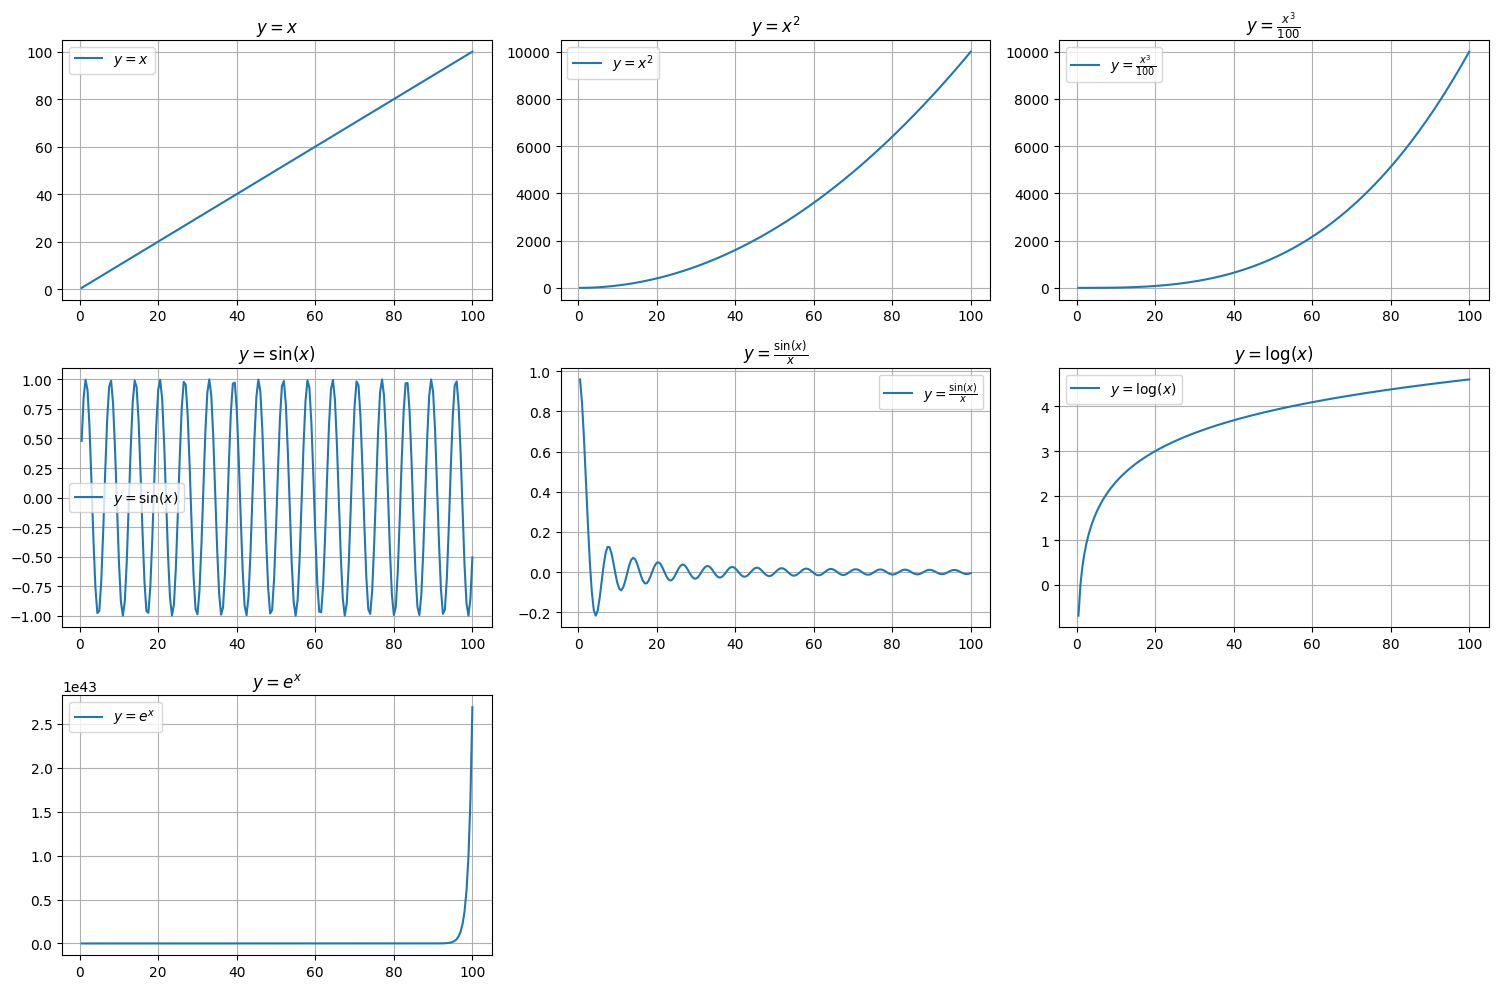

In [12]:
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.5, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Plot the functions
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.plot(x, y1, label='$y = x$')
plt.title('$y = x$')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(x, y2, label='$y = x^2$')
plt.title('$y = x^2$')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(x, y3, label='$y = \\frac{x^3}{100}$')
plt.title('$y = \\frac{x^3}{100}$')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(x, y4, label='$y = \sin(x)$')
plt.title('$y = \sin(x)$')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 5)
plt.plot(x, y5, label='$y = \\frac{\sin(x)}{x}$')
plt.title('$y = \\frac{\sin(x)}{x}$')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(x, y6, label='$y = \log(x)$')
plt.title('$y = \log(x)$')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(x, y7, label='$y = e^x$')
plt.title('$y = e^x$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
